### Raushan Kumar
### LinkedIn: https://www.linkedin.com/in/raushan-kumar-29427616b/

# Loading and cleaning the data

In [90]:
%autosave 10

Autosaving every 10 seconds


In [91]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [92]:
# Reading data from csv file
df = pd.read_csv("student_scores - student_scores.csv")
print("Data imported successfully")

Data imported successfully


In [93]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [94]:
df.shape

(25, 2)

In [95]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [96]:
sum(df["Scores"].isnull())

0

In [97]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


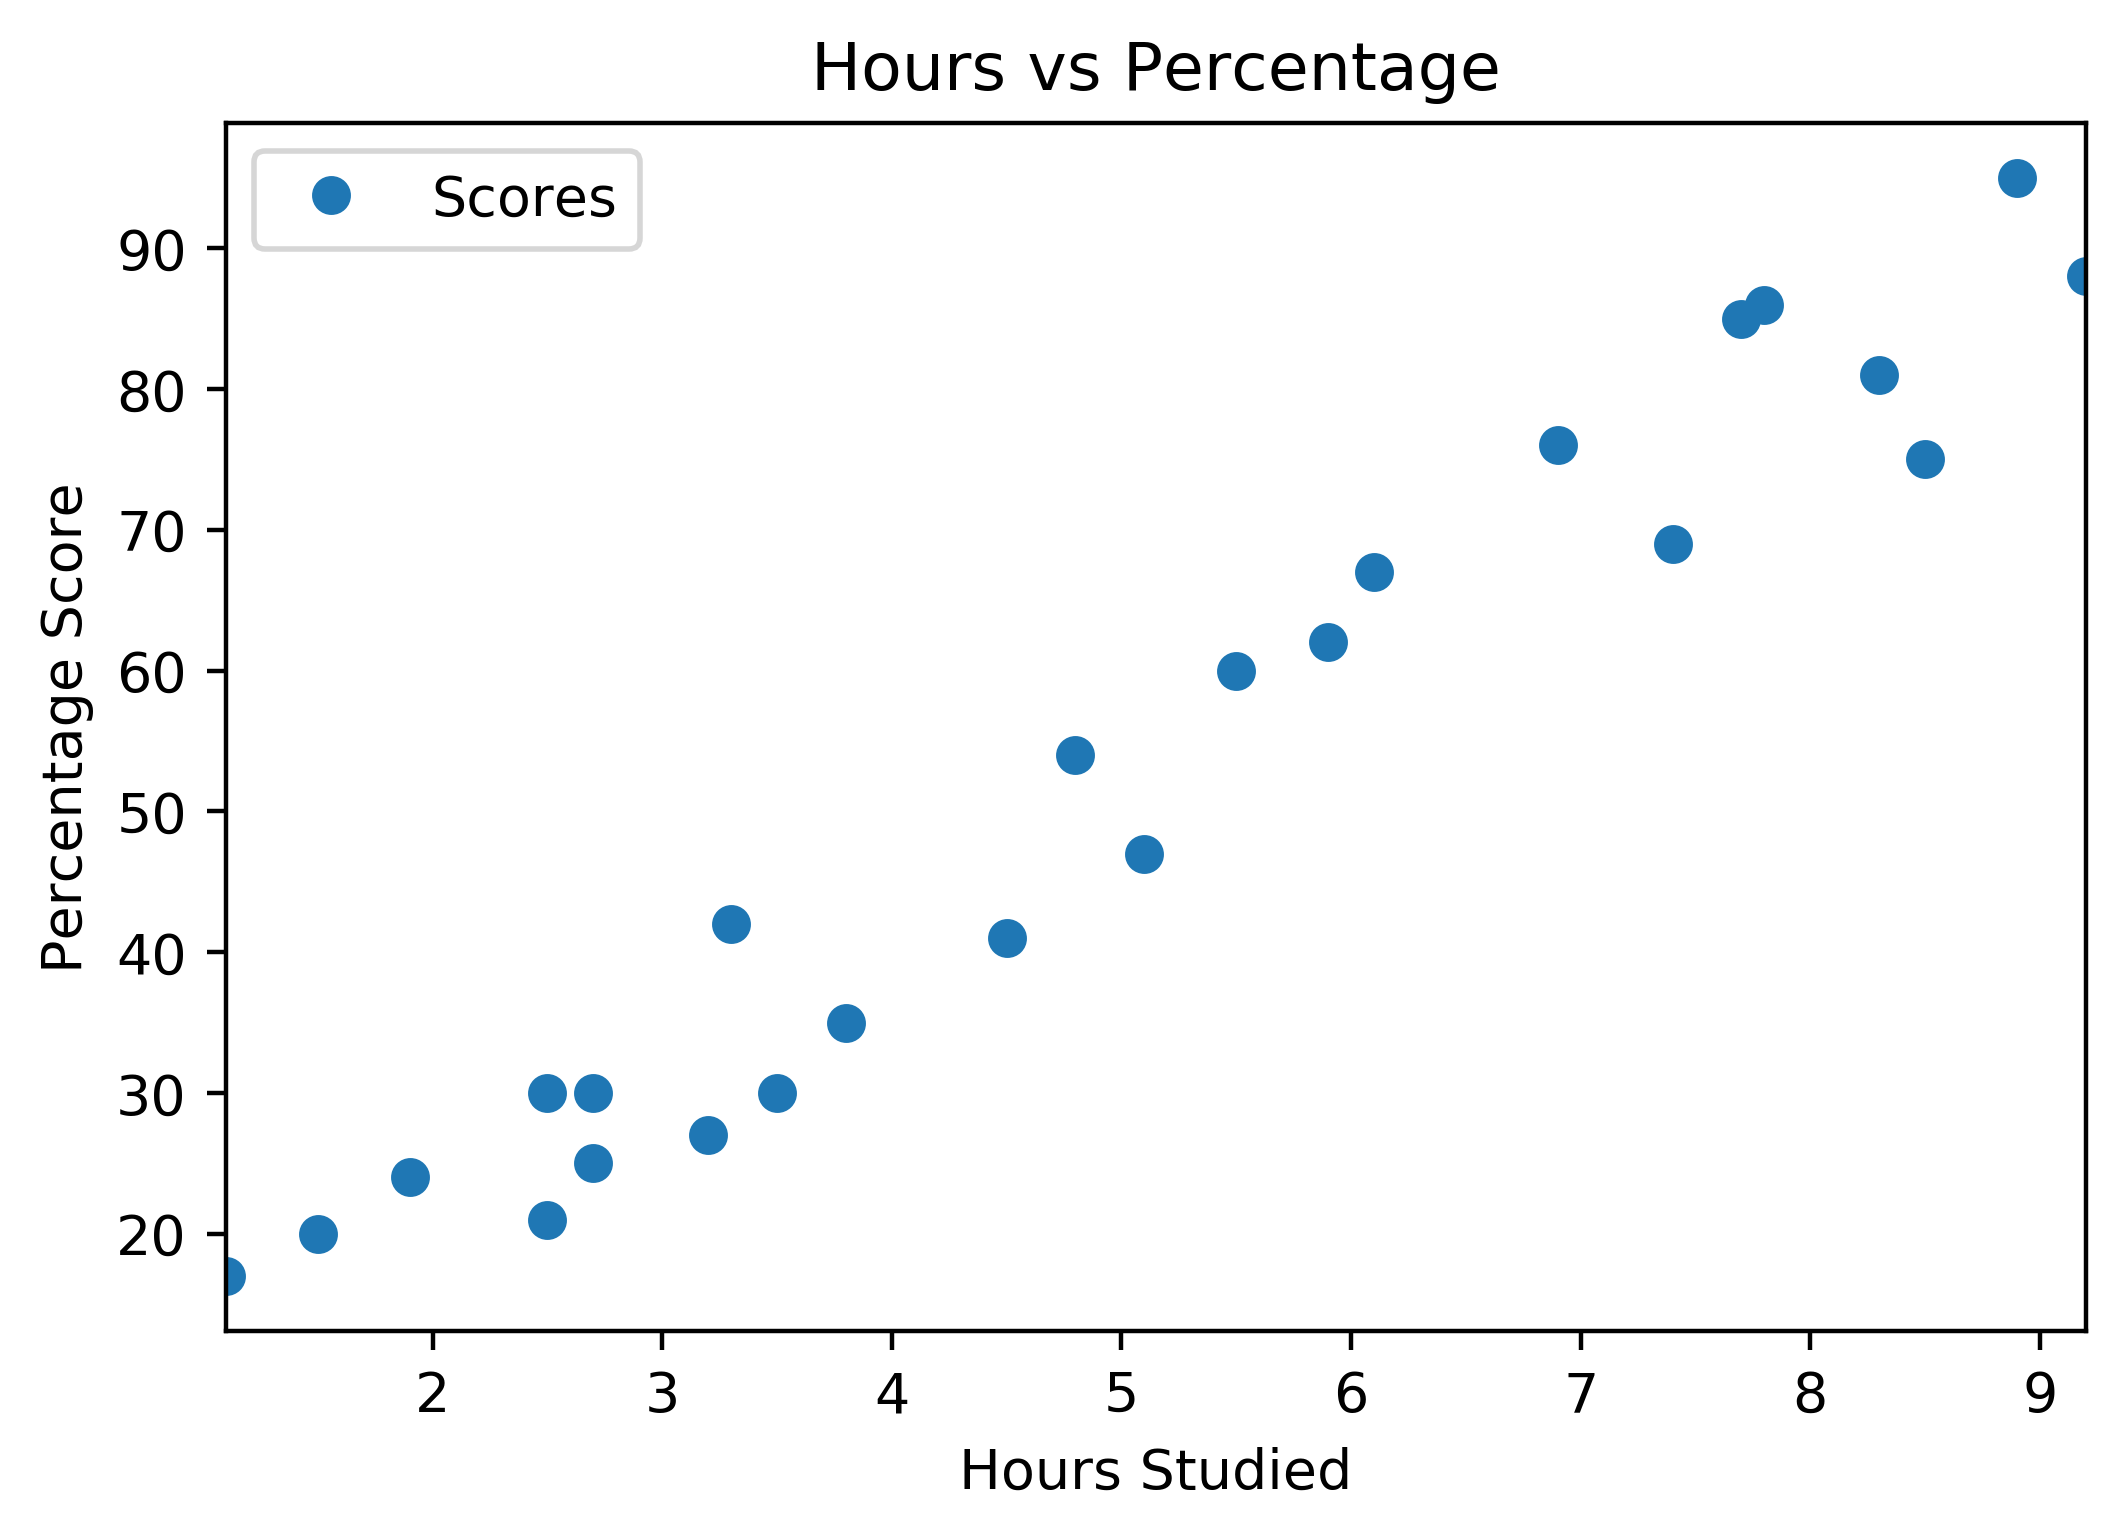

In [98]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [99]:
print('''From the graph above,
      we can clearly see that there is 
      a positive linear relation between 
      the number of hours studied and percentage of score''')

From the graph above,
      we can clearly see that there is 
      a positive linear relation between 
      the number of hours studied and percentage of score


# Preparing the data

In [100]:
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values  

In [101]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [102]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [104]:
np.mean(y_train)

53.95

In [105]:
np.mean(y_test)

41.6

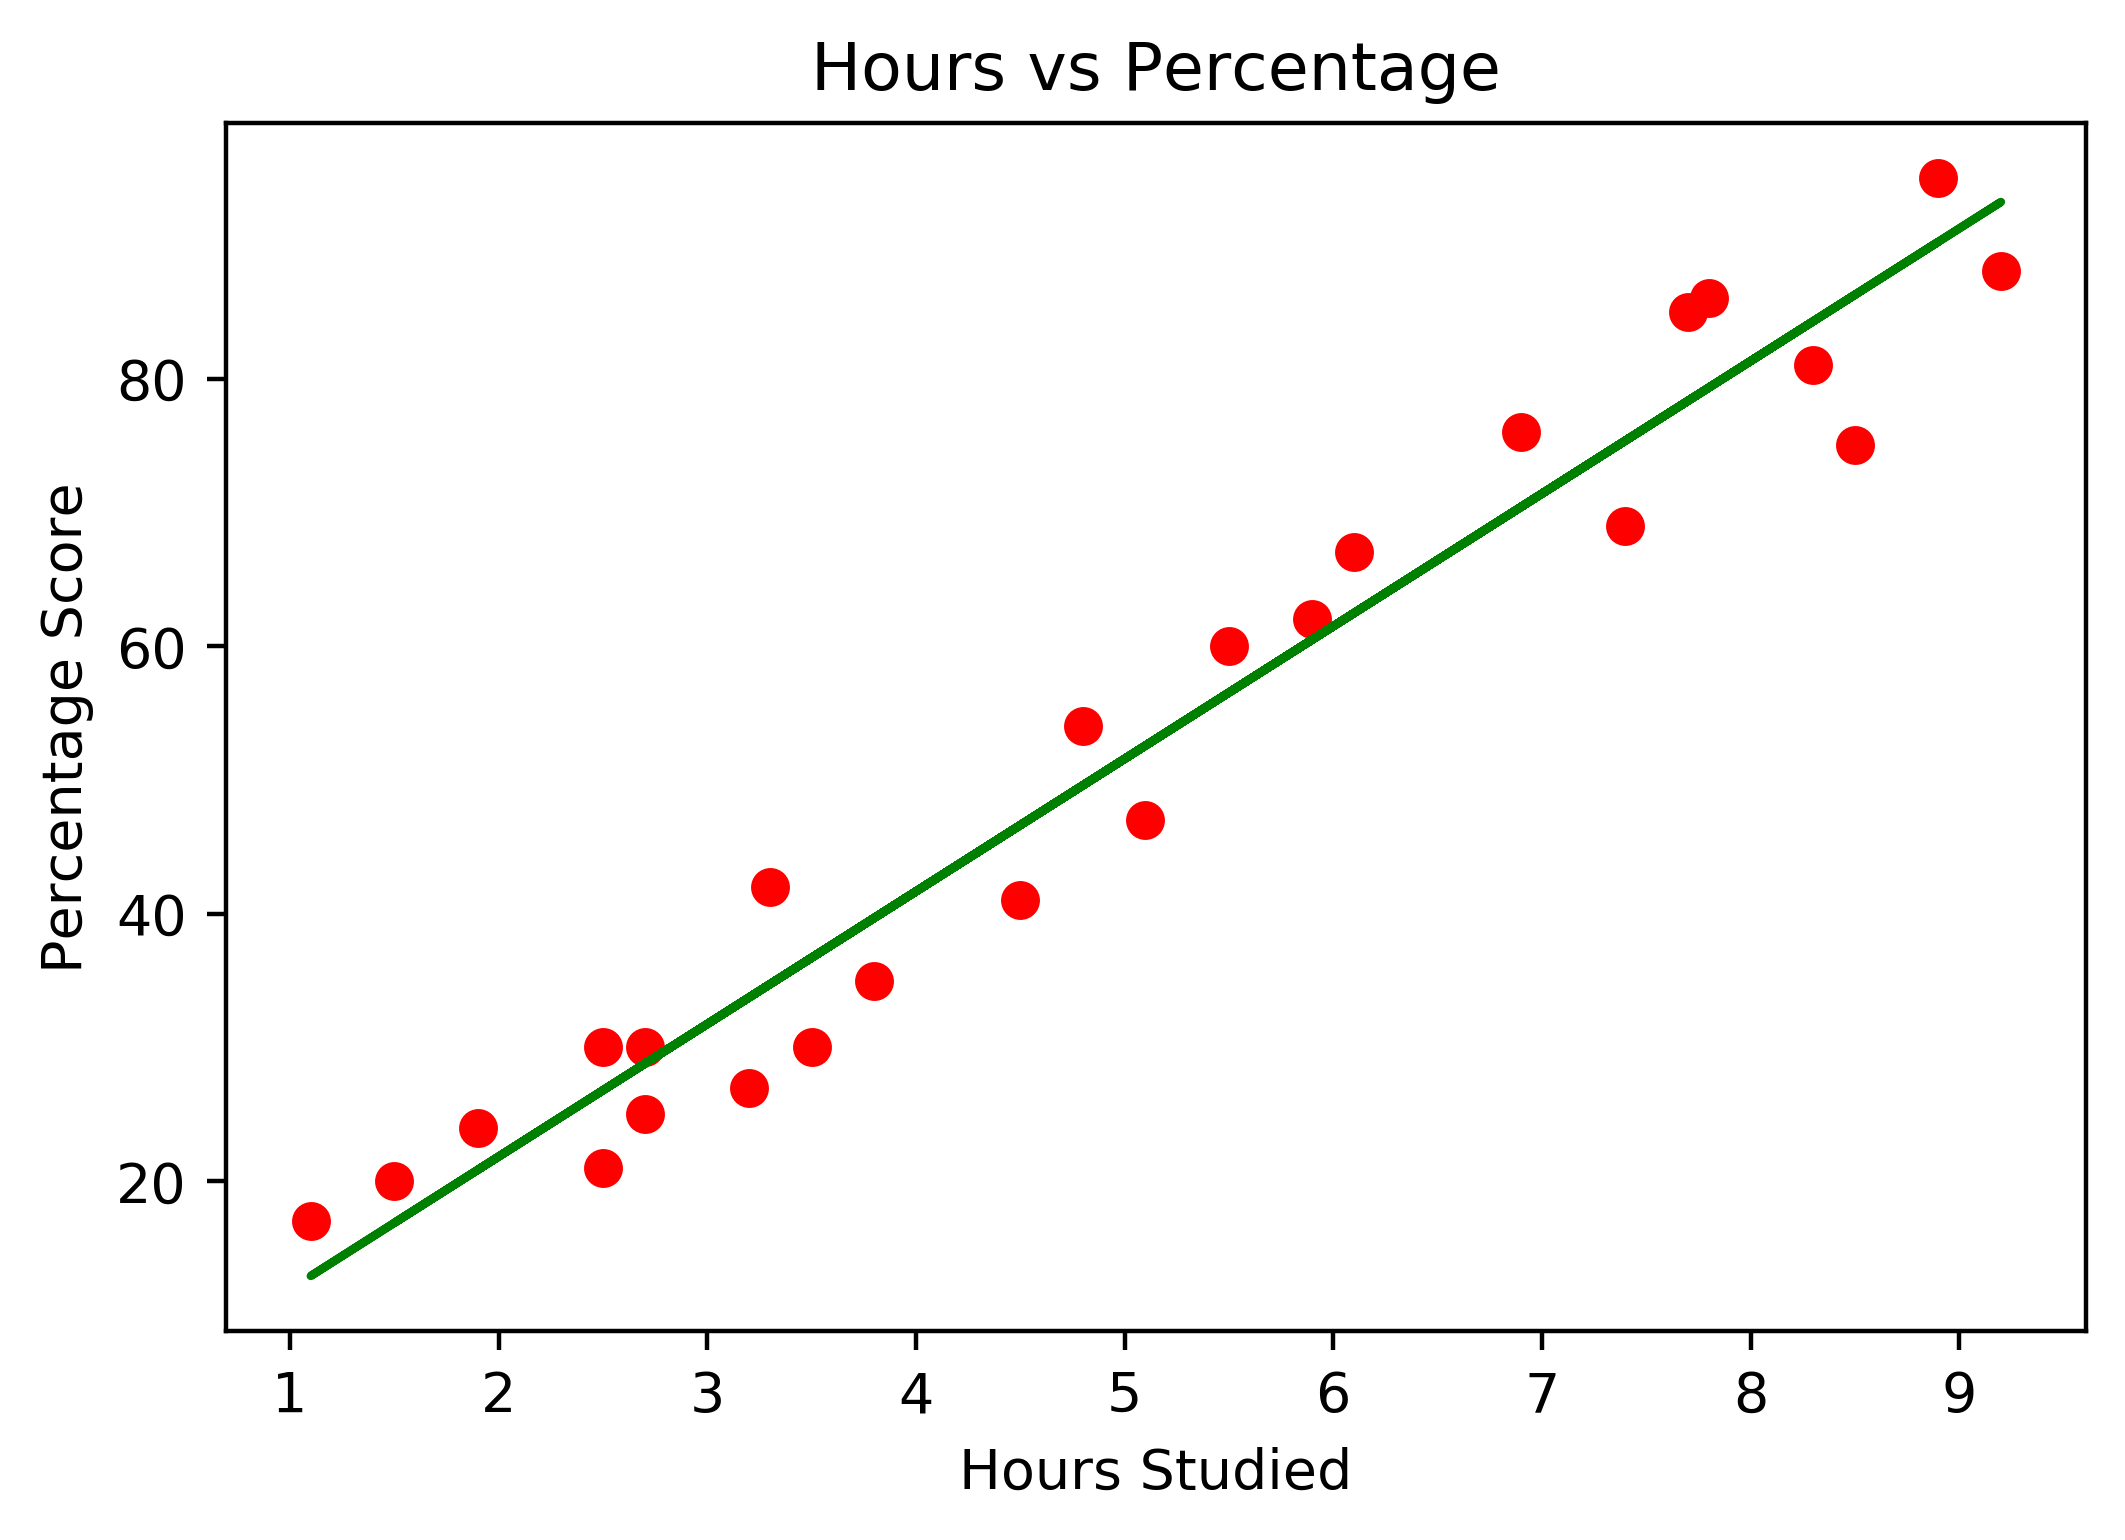

In [106]:
# Plotting the regression line
line = reg.coef_*X + reg.intercept_

# Plotting for the whole dataset
plt.scatter(X, y, color='red')
plt.plot(X, line, color='green')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

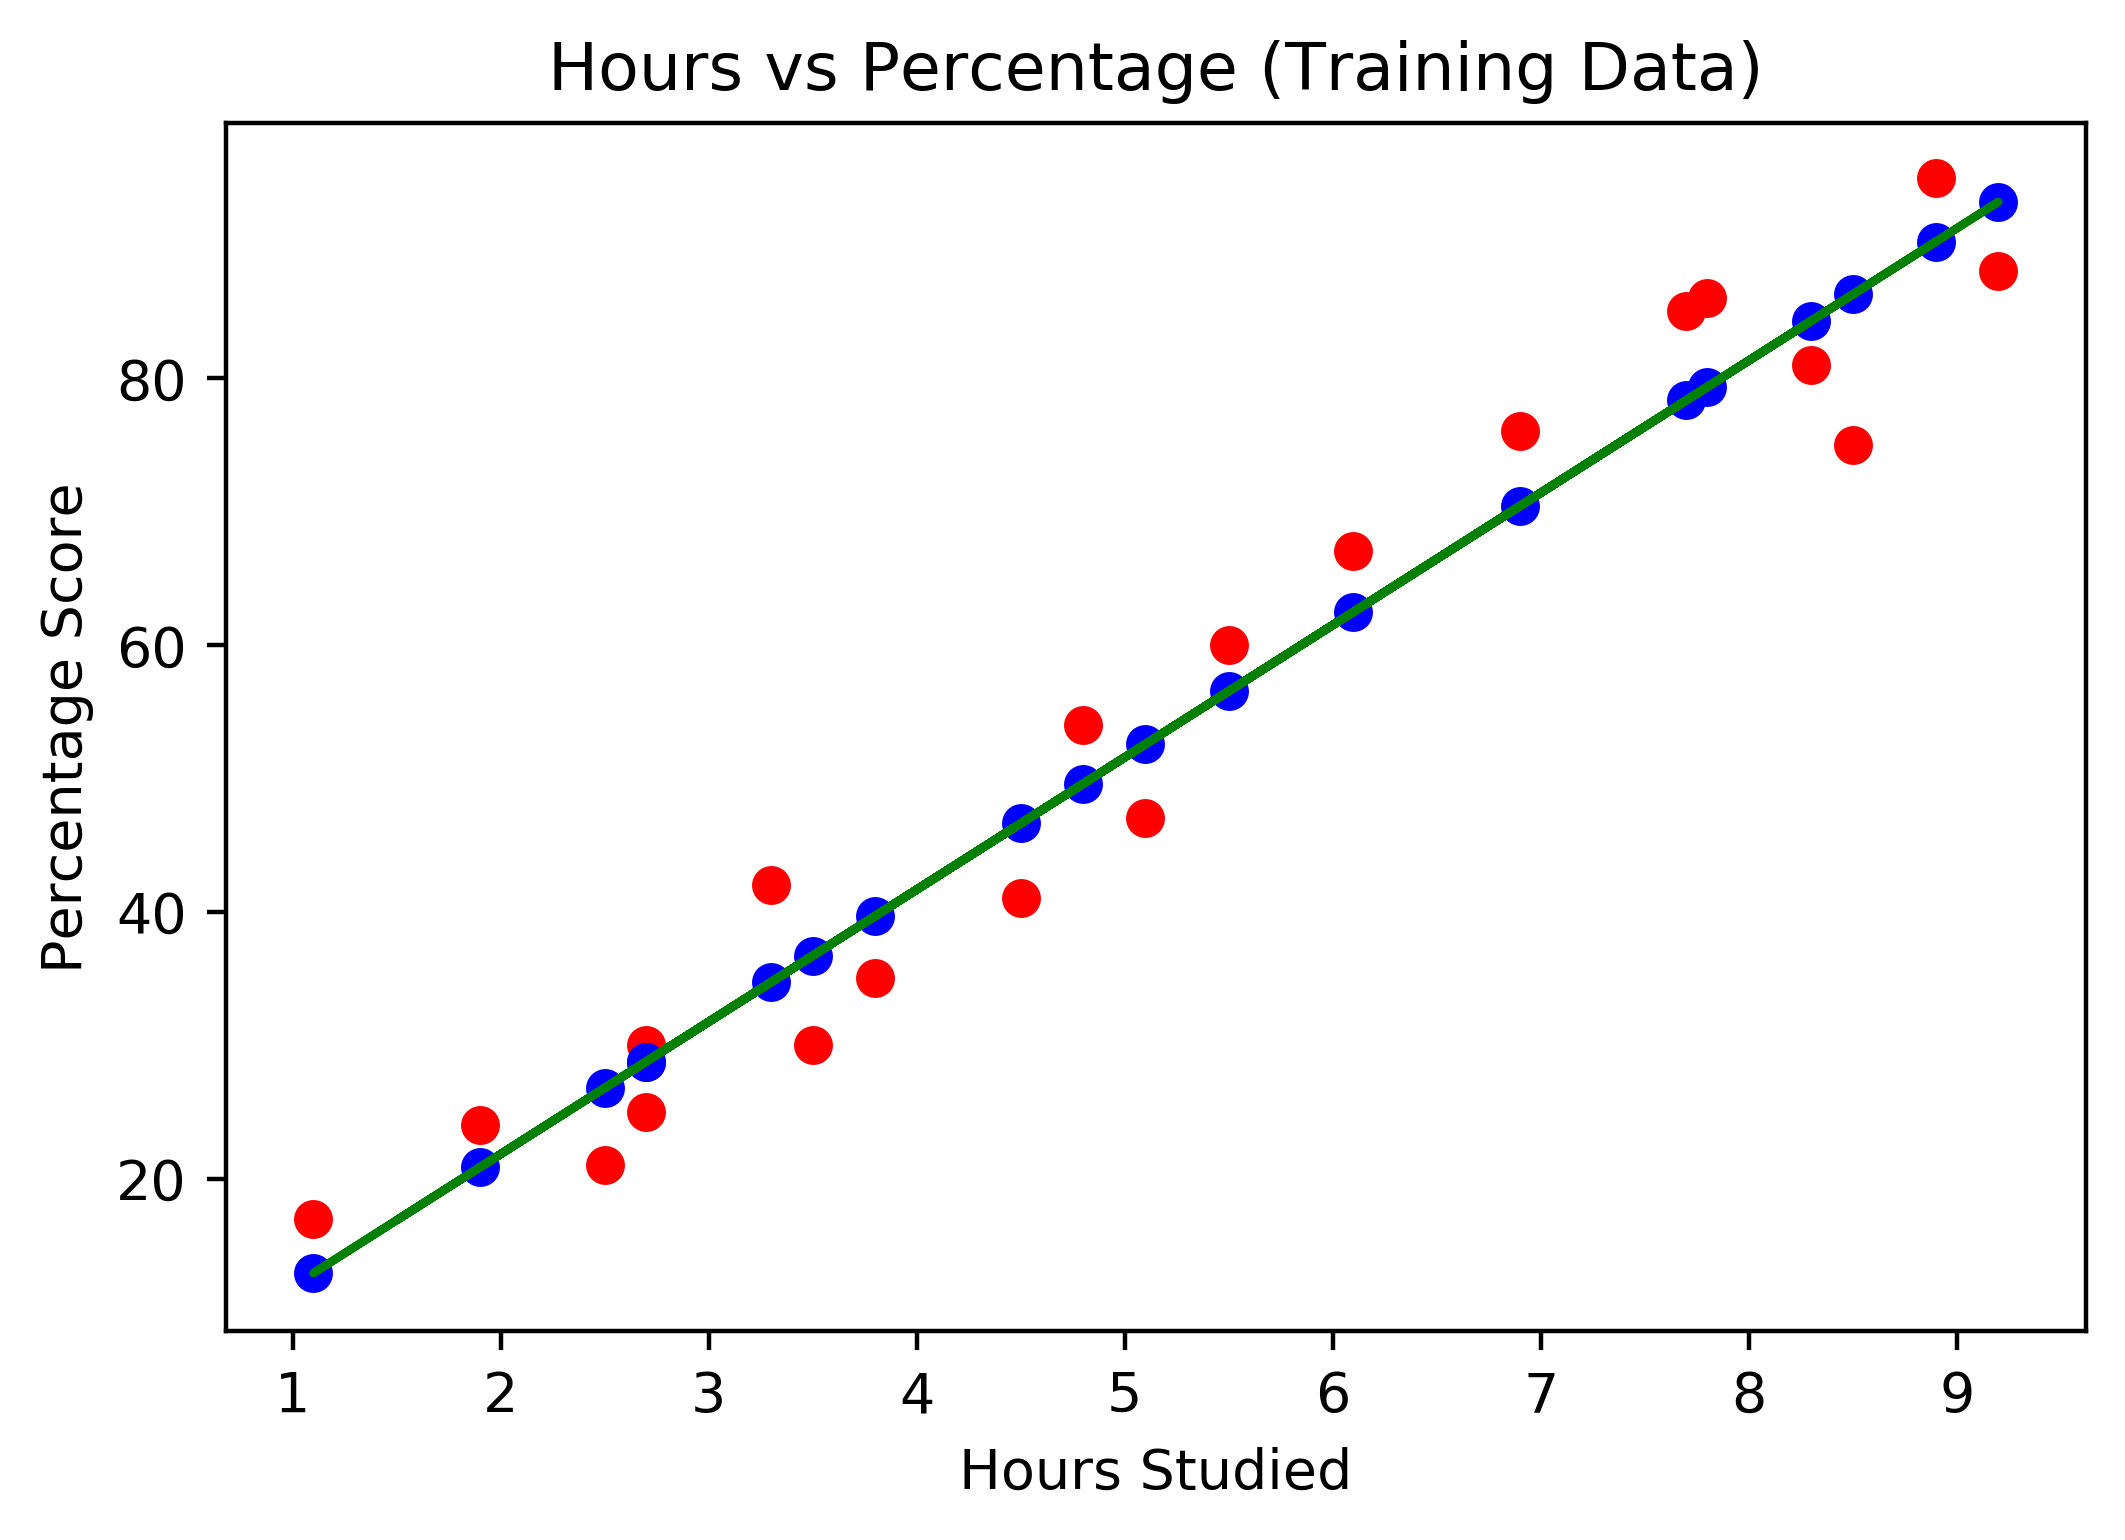

In [107]:
# Plotting the training data for actual and predicted values
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, reg.predict(X_train), color='blue')
plt.plot(X, line, color='green')
plt.title('Hours vs Percentage (Training Data)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making Predictions

In [108]:
# Predicting the scores
y_pred = reg.predict(X_test)

In [109]:
# Comparing Actual vs Predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


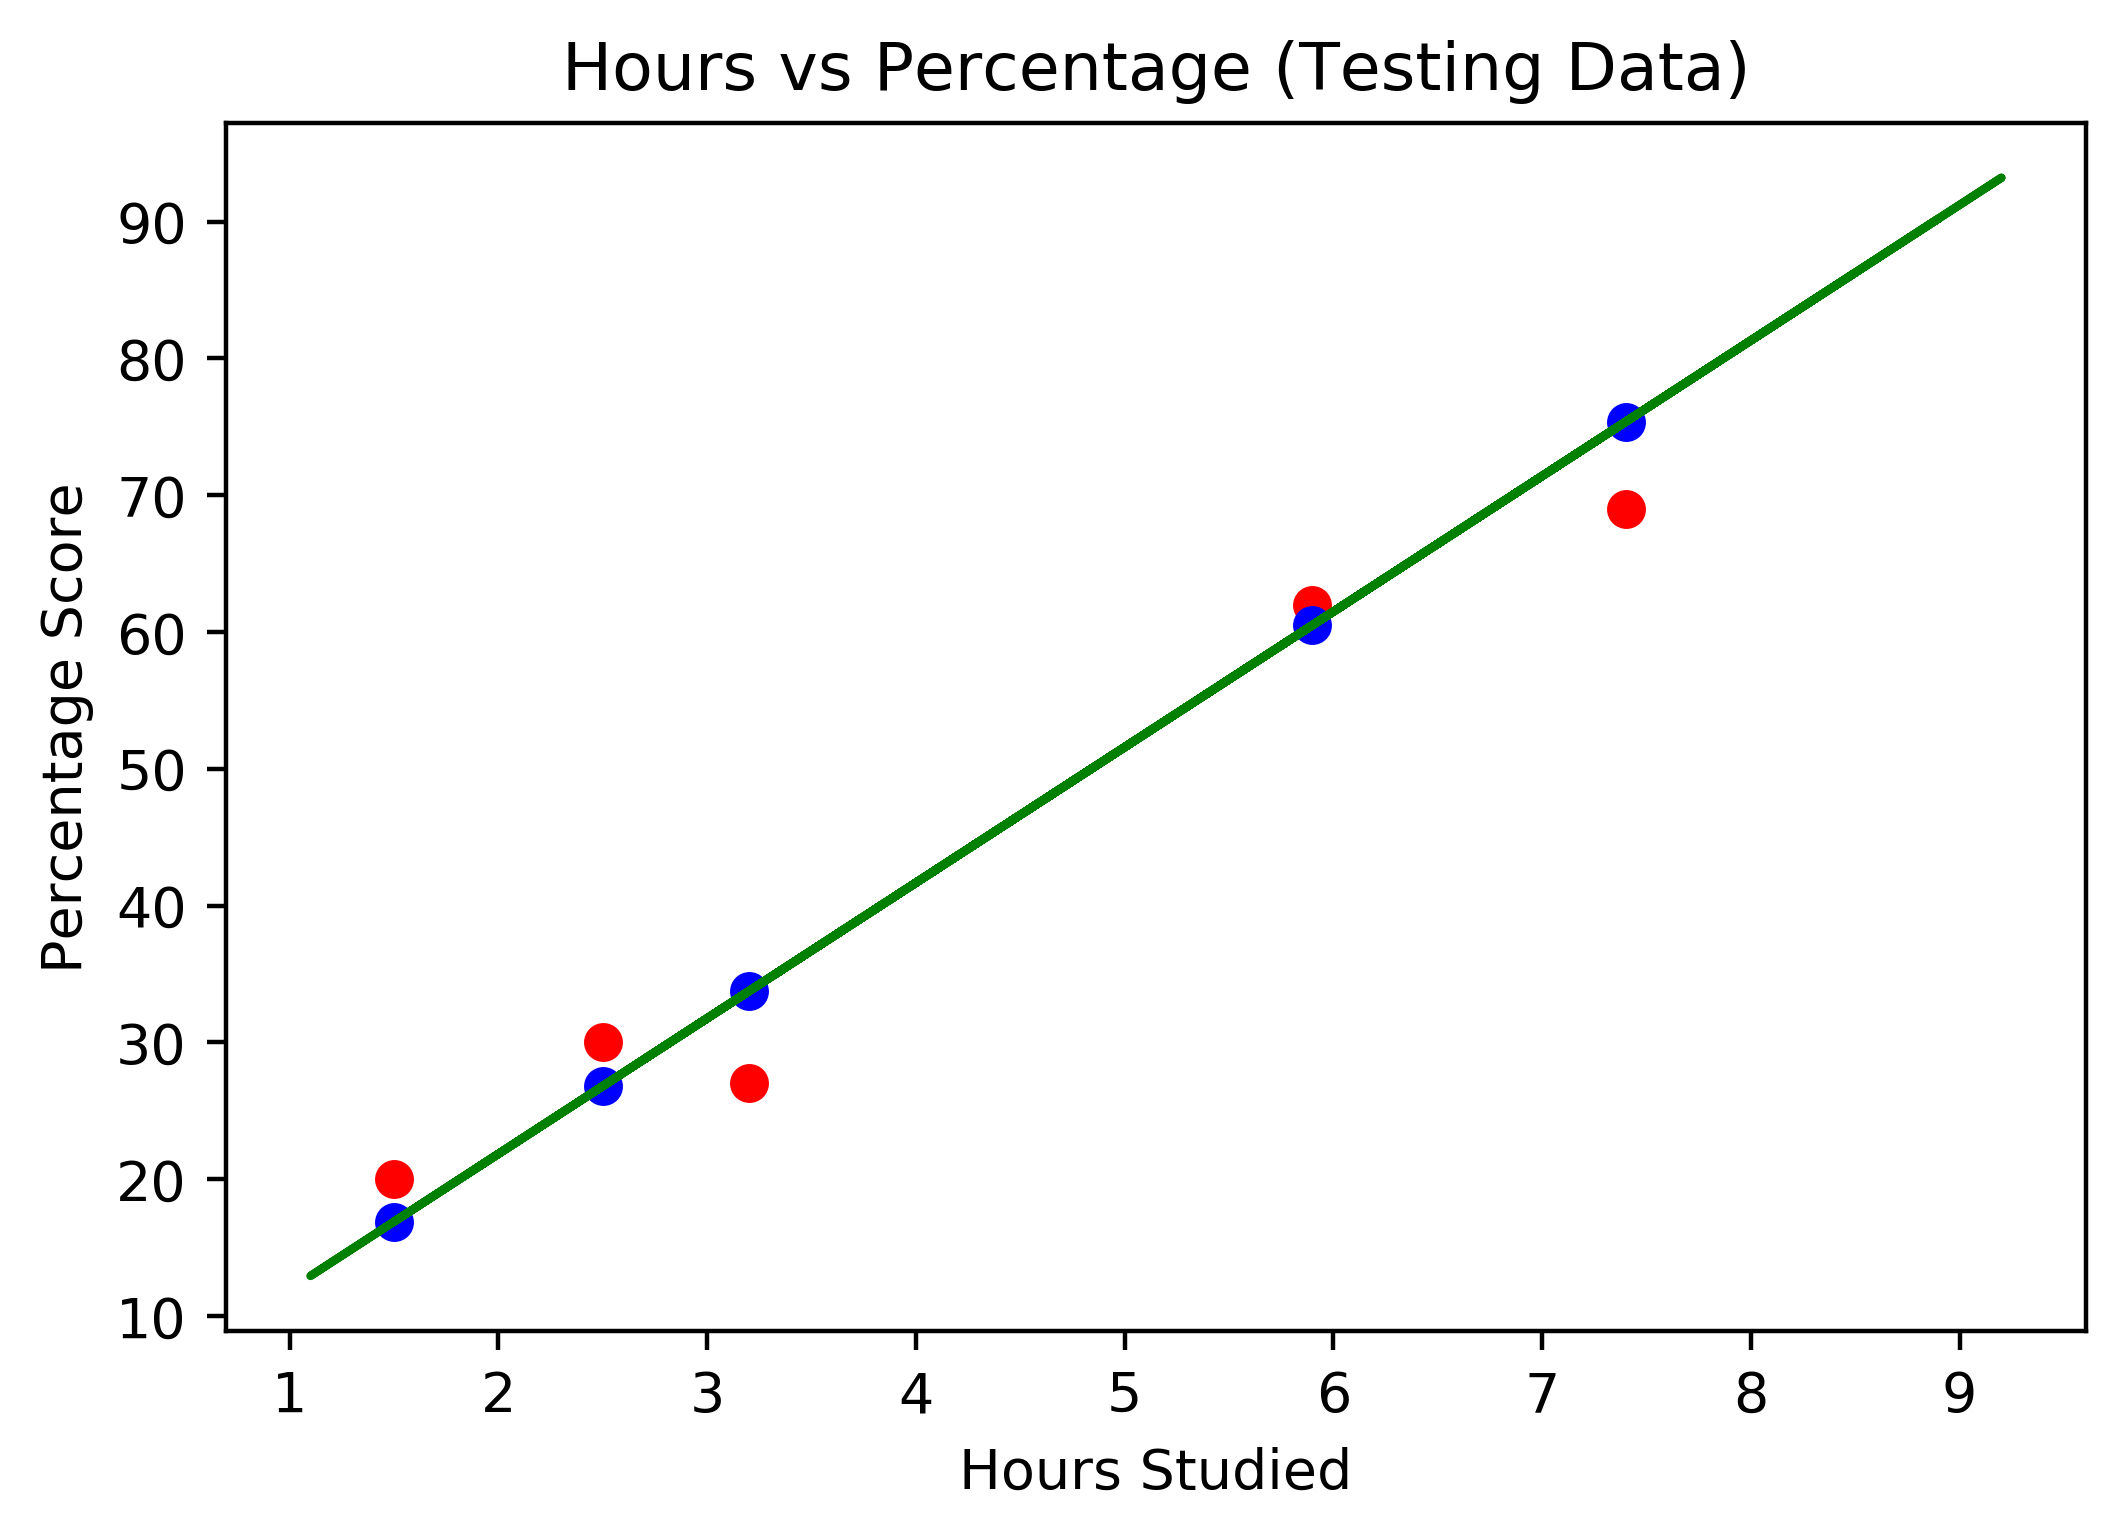

In [110]:
# Plotting the testing data for predicted and actual values
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='blue')
plt.plot(X, line, color='green')
plt.title('Hours vs Percentage (Testing Data)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [111]:
np.mean(y_test)

41.6

In [112]:
np.mean(y_pred)

42.65185161206786

In [113]:
# Testing for unseen data
hours = np.array([9.25])
unseen_pred = reg.predict(hours.reshape(1, -1))

print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(unseen_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [114]:
# Evaluating the performance of algorithm
reg.score(X_test, y_test)

0.9454906892105356

In [116]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
